In [1]:
library(magrittr)
library(lme4)
library(optimx)
library(dplyr)
library(readr)
library(jtools)
library(reticulate)
library(PerformanceAnalytics)
library(tidyverse)
library(ggcorrplot)
library(ggplot2)

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exc

In [2]:
test_scores <- read.csv("/kaggle/input/predicting-learning-outcomes/test_scores.csv")
test_scores

X,individual,account,GamFreq3Level,Pretest3Level,LG3Level,NLG3Level,Pretest,Posttest,LG,⋯,Gender,Ethnicity,ClassPeriod,Class,Lunch,PURMOrFRLunch,PredAvgiAFM,TotalOpportunity,int_iAFM,int_iAFM_reverse
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,Stu_00e7976d1e35e69629ea814e7663ae6b,dd112,High,Med,High,High,0.37,0.60,0.23,⋯,F,Majority,DD1,DD,F/R,Yes,0.5070812,245,0.315784089,0.21180323
2,Stu_02ed92b332024cc68a4c042697b1c57c,dd111,High,High,Low,Low,0.67,0.60,-0.08,⋯,M,Majority,DD1,DD,N,No,0.7219338,358,0.461857129,0.77542593
3,Stu_0579ea4e9dd6bcf83463cd55a419fd79,dd100,Low,Low,High,Med,0.13,0.37,0.23,⋯,M,Majority,DD1,DD,N,No,0.3789256,263,-2.225388974,-0.64721636
4,Stu_05bdce2051525a38318a7eb7f95eec84,dd159,Med,Low,Med,Med,0.21,0.42,0.21,⋯,F,Majority,DD9,DD,N,No,0.5110963,210,0.266272563,0.29016278
5,Stu_065c3c6616e42d1fddfbb9547974ba8c,oc189,High,High,Low,Low,0.53,0.30,-0.23,⋯,F,Majority,OC7,OCLA,N,No,0.4364856,256,-0.226846465,-0.07554551
6,Stu_0788b750fead0fb0997d51675227d707,oc162,Med,High,Med,High,0.55,0.71,0.16,⋯,F,Majority,OC6,OCMA,N,No,0.6495000,160,1.123422059,1.09015362
7,Stu_0892bfc0a300449a95aa3b51a7a8a213,oc137,Med,High,High,High,0.55,0.79,0.24,⋯,F,Majority,OC6,OCMA,N,No,0.7614241,337,0.892581864,0.59401157
8,Stu_0ac8dd125ce01465481816664835ad25,oc129,High,Low,High,Med,0.07,0.40,0.33,⋯,F,PotentialURM,OC3,OCLA,N,Yes,0.5561448,191,-0.322602120,-0.53127213
9,Stu_10dd499fee6bd8bb2c1eea42a810318f,dd128,Low,Low,Med,Med,0.21,0.38,0.16,⋯,M,Majority,DD6,DD,N,No,0.6247452,198,-0.200462128,-0.07601047


In [3]:
pretest_scores = test_scores
posttest_scores = test_scores
pretest_scores$TestScore = pretest_scores$Pretest
posttest_scores$TestScore = posttest_scores$Posttest
pretest_scores$TestTime = "Pre"
posttest_scores$TestTime = "Post"
pretest_scores$ProcessModelPrediction1 = pretest_scores$int_iAFM
posttest_scores$ProcessModelPrediction1 = posttest_scores$int_iAFM_reverse
sigmoid <- function(x) {
  return(1 / (1 + exp(-x)))
}
pretest_scores$ProcessModelPrediction1 = 1 / (1 + exp(-pretest_scores$ProcessModelPrediction1))
posttest_scores$ProcessModelPrediction1 = 1 / (1 + exp(-posttest_scores$ProcessModelPrediction1))
# pretest_scores$ProcessModelPrediction1 = lapply(pretest_scores$ProcessModelPrediction1, sigmoid)
# posttest_scores$ProcessModelPrediction1 = lapply(posttest_scores$ProcessModelPrediction1, sigmoid)
# pretest_scores <- pretest_scores[complete.cases(pretest_scores$ProcessModelPrediction1), ]
# posttest_scores

In [4]:
pretest_scores = test_scores
posttest_scores = test_scores
pretest_scores$TestScore = pretest_scores$Pretest
posttest_scores$TestScore = posttest_scores$Posttest
pretest_scores$TestTime = "Pre"
posttest_scores$TestTime = "Post"
pretest_scores$ProcessModelPrediction1 = 1 / (1 + exp(-pretest_scores$int_iAFM))
posttest_scores$ProcessModelPrediction1 = 1 / (1 + exp(-posttest_scores$int_iAFM_reverse))
pretest_scores$ProcessModelPrediction2 = pretest_scores$ProcessModelPrediction1
posttest_scores$ProcessModelPrediction2 = 1 / (1 + exp(-posttest_scores$PredAvgiAFM))
pretest_scores = pretest_scores[, c("individual", "TestTime", "TestScore", "ProcessModelPrediction1", "ProcessModelPrediction2")]
posttest_scores = posttest_scores[, c("individual", "TestTime", "TestScore", "ProcessModelPrediction1", "ProcessModelPrediction2")]
train_df = rbind(pretest_scores, posttest_scores)
train_df

individual,TestTime,TestScore,ProcessModelPrediction1,ProcessModelPrediction2
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Stu_00e7976d1e35e69629ea814e7663ae6b,Pre,0.37,0.57829646,0.57829646
Stu_02ed92b332024cc68a4c042697b1c57c,Pre,0.67,0.61345465,0.61345465
Stu_0579ea4e9dd6bcf83463cd55a419fd79,Pre,0.13,0.09749361,0.09749361
Stu_05bdce2051525a38318a7eb7f95eec84,Pre,0.21,0.56617760,0.56617760
Stu_065c3c6616e42d1fddfbb9547974ba8c,Pre,0.53,0.44353033,0.44353033
Stu_0788b750fead0fb0997d51675227d707,Pre,0.55,0.75462292,0.75462292
Stu_0892bfc0a300449a95aa3b51a7a8a213,Pre,0.55,0.70942269,0.70942269
Stu_0ac8dd125ce01465481816664835ad25,Pre,0.07,0.42004172,0.42004172
Stu_10dd499fee6bd8bb2c1eea42a810318f,Pre,0.21,0.45005162,0.45005162


In [5]:
# Model 1: Test-Score ~ Process-Model-Prediction1 [+ Intercept]
cat("model1")
model1 = train_df %>%
  lm(TestScore ~ ProcessModelPrediction1, data = .)
summ(model1)
AIC(model1)
BIC(model1)
logLik(model1)
cat("\n")

# Model 2: Test-Score ~ Process-Model-Prediction2 [+ Intercept]
cat("model1")
model2 = train_df %>%
  lm(TestScore ~ ProcessModelPrediction2, data = .)
summ(model2)
AIC(model2)
BIC(model2)
logLik(model2)
cat("\n")

# Model 3: Test-Score ~ 1* Process-Model-Prediction1 [+ Intercept]
cat("model3")
model3 = train_df %>%
  lm(TestScore ~ offset(ProcessModelPrediction1), data = .)
summ(model3)
Residuals <- summary(model3)$residuals
SumResSquared <- sum(Residuals^2)
TotalSumSquares <- sum((train_df$TestScore - mean(train_df$TestScore))^2)
RSquared <- 1 - (SumResSquared/TotalSumSquares)
RSquared
AIC(model3)
BIC(model3)
logLik(model3)
cat("\n")

# Model 4: Test-Score ~ 1* Process-Model-Prediction2 [+ Intercept]
cat("model4")
model4 = train_df %>%
  lm(TestScore ~ offset(ProcessModelPrediction2), data = .)
summ(model4)
Residuals <- summary(model4)$residuals
SumResSquared <- sum(Residuals^2)
TotalSumSquares <- sum((train_df$TestScore - mean(train_df$TestScore))^2)
RSquared <- 1 - (SumResSquared/TotalSumSquares)
RSquared
AIC(model4)
BIC(model4)
logLik(model4)
cat("\n")

model1

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

MODEL FIT:
F(1,256) = 197.55, p = 0.00
R² = 0.44
Adj. R² = 0.43 

Standard errors: OLS
-----------------------------------------------------------
                                Est.   S.E.   t val.      p
----------------------------- ------ ------ -------- ------
(Intercept)                     0.04   0.03     1.24   0.22
ProcessModelPrediction1         0.75   0.05    14.06   0.00
-----------------------------------------------------------

[1] -222.5689

[1] -211.91

'log Lik.' 114.2844 (df=3)


model1

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

MODEL FIT:
F(1,256) = 140.99, p = 0.00
R² = 0.36
Adj. R² = 0.35 

Standard errors: OLS
------------------------------------------------------------
                                 Est.   S.E.   t val.      p
----------------------------- ------- ------ -------- ------
(Intercept)                     -0.06   0.04    -1.36   0.18
ProcessModelPrediction2          0.83   0.07    11.87   0.00
------------------------------------------------------------

[1] -188.2023

[1] -177.5434

'log Lik.' 97.10116 (df=3)


model3

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.09   0.01    -9.21   0.00
------------------------------------------------

[1] 0.3863829

[1] -203.0144

[1] -195.9085

'log Lik.' 103.5072 (df=2)


model4

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.16   0.01   -14.99   0.00
------------------------------------------------

[1] 0.339167

[1] -183.8889

[1] -176.783

'log Lik.' 93.94445 (df=2)

In [6]:
pretest_scores = test_scores
posttest_scores = test_scores
pretest_scores$TestScore = pretest_scores$Pretest + 0.0000001
posttest_scores$TestScore = posttest_scores$Posttest + 0.0000001
pretest_scores$TestScore = log(pretest_scores$TestScore / (1 - pretest_scores$TestScore))  # log-odds
posttest_scores$TestScore = log(posttest_scores$TestScore / (1 - posttest_scores$TestScore))  # log-odds
pretest_scores$TestTime = "Pre"
posttest_scores$TestTime = "Post"
pretest_scores$ProcessModelPrediction1 = pretest_scores$int_iAFM
posttest_scores$ProcessModelPrediction1 = posttest_scores$int_iAFM_reverse
pretest_scores$ProcessModelPrediction2 = pretest_scores$ProcessModelPrediction1
posttest_scores$ProcessModelPrediction2 = posttest_scores$PredAvgiAFM
pretest_scores = pretest_scores[, c("individual", "TestTime", "TestScore", "ProcessModelPrediction1", "ProcessModelPrediction2")]
posttest_scores = posttest_scores[, c("individual", "TestTime", "TestScore", "ProcessModelPrediction1", "ProcessModelPrediction2")]
train_df = rbind(pretest_scores, posttest_scores)
train_df

individual,TestTime,TestScore,ProcessModelPrediction1,ProcessModelPrediction2
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Stu_00e7976d1e35e69629ea814e7663ae6b,Pre,-0.5322164,0.315784089,0.315784089
Stu_02ed92b332024cc68a4c042697b1c57c,Pre,0.7081855,0.461857129,0.461857129
Stu_0579ea4e9dd6bcf83463cd55a419fd79,Pre,-1.9009579,-2.225388974,-2.225388974
Stu_05bdce2051525a38318a7eb7f95eec84,Pre,-1.3249248,0.266272563,0.266272563
Stu_065c3c6616e42d1fddfbb9547974ba8c,Pre,0.1201447,-0.226846465,-0.226846465
Stu_0788b750fead0fb0997d51675227d707,Pre,0.2006711,1.123422059,1.123422059
Stu_0892bfc0a300449a95aa3b51a7a8a213,Pre,0.2006711,0.892581864,0.892581864
Stu_0ac8dd125ce01465481816664835ad25,Pre,-2.5866878,-0.322602120,-0.322602120
Stu_10dd499fee6bd8bb2c1eea42a810318f,Pre,-1.3249248,-0.200462128,-0.200462128


In [7]:
# Model 1: Test-Score ~ Process-Model-Prediction1 [+ Intercept]
cat("model1")
model1 = train_df %>%
  lm(TestScore ~ ProcessModelPrediction1, data = .)
summ(model1)
AIC(model1)
BIC(model1)
logLik(model1)
cat("\n")

# Model 2: Test-Score ~ Process-Model-Prediction2 [+ Intercept]
cat("model1")
model2 = train_df %>%
  lm(TestScore ~ ProcessModelPrediction2, data = .)
summ(model2)
AIC(model2)
BIC(model2)
logLik(model2)
cat("\n")

# Model 3: Test-Score ~ 1* Process-Model-Prediction1 [+ Intercept]
cat("model3")
model3 = train_df %>%
  lm(TestScore ~ offset(ProcessModelPrediction1), data = .)
summ(model3)
Residuals <- summary(model3)$residuals
SumResSquared <- sum(Residuals^2)
TotalSumSquares <- sum((train_df$TestScore - mean(train_df$TestScore))^2)
RSquared <- 1 - (SumResSquared/TotalSumSquares)
RSquared
AIC(model3)
BIC(model3)
logLik(model3)
cat("\n")

# Model 4: Test-Score ~ 1* Process-Model-Prediction2 [+ Intercept]
cat("model4")
model4 = train_df %>%
  lm(TestScore ~ offset(ProcessModelPrediction2), data = .)
summ(model4)
Residuals <- summary(model4)$residuals
SumResSquared <- sum(Residuals^2)
TotalSumSquares <- sum((train_df$TestScore - mean(train_df$TestScore))^2)
RSquared <- 1 - (SumResSquared/TotalSumSquares)
RSquared
AIC(model4)
BIC(model4)
logLik(model4)
cat("\n")

model1

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

MODEL FIT:
F(1,256) = 77.50, p = 0.00
R² = 0.23
Adj. R² = 0.23 

Standard errors: OLS
------------------------------------------------------------
                                 Est.   S.E.   t val.      p
----------------------------- ------- ------ -------- ------
(Intercept)                     -0.48   0.08    -6.13   0.00
ProcessModelPrediction1          0.71   0.08     8.80   0.00
------------------------------------------------------------

[1] 852.9558

[1] 863.6146

'log Lik.' -423.4779 (df=3)


model1

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

MODEL FIT:
F(1,256) = 56.38, p = 0.00
R² = 0.18
Adj. R² = 0.18 

Standard errors: OLS
------------------------------------------------------------
                                 Est.   S.E.   t val.      p
----------------------------- ------- ------ -------- ------
(Intercept)                     -0.70   0.09    -8.17   0.00
ProcessModelPrediction2          0.78   0.10     7.51   0.00
------------------------------------------------------------

[1] 869.8359

[1] 880.4948

'log Lik.' -431.918 (df=3)


model3

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.48   0.08    -6.00   0.00
------------------------------------------------

[1] 0.195409

[1] 863.0969

[1] 870.2029

'log Lik.' -429.5485 (df=2)


model4

MODEL INFO:
Observations: 258
Dependent Variable: TestScore
Type: OLS linear regression 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         -0.77   0.08    -9.43   0.00
------------------------------------------------

[1] 0.1658036

[1] 872.4197

[1] 879.5256

'log Lik.' -434.2099 (df=2)

In [8]:
train_df$TestPrediction1 <- predict(model3, train_df)
train_df$TestPrediction2 <- predict(model4, train_df)
write.csv(train_df, file = "one_parameter_fit_data_logodds_with_prediction.csv")

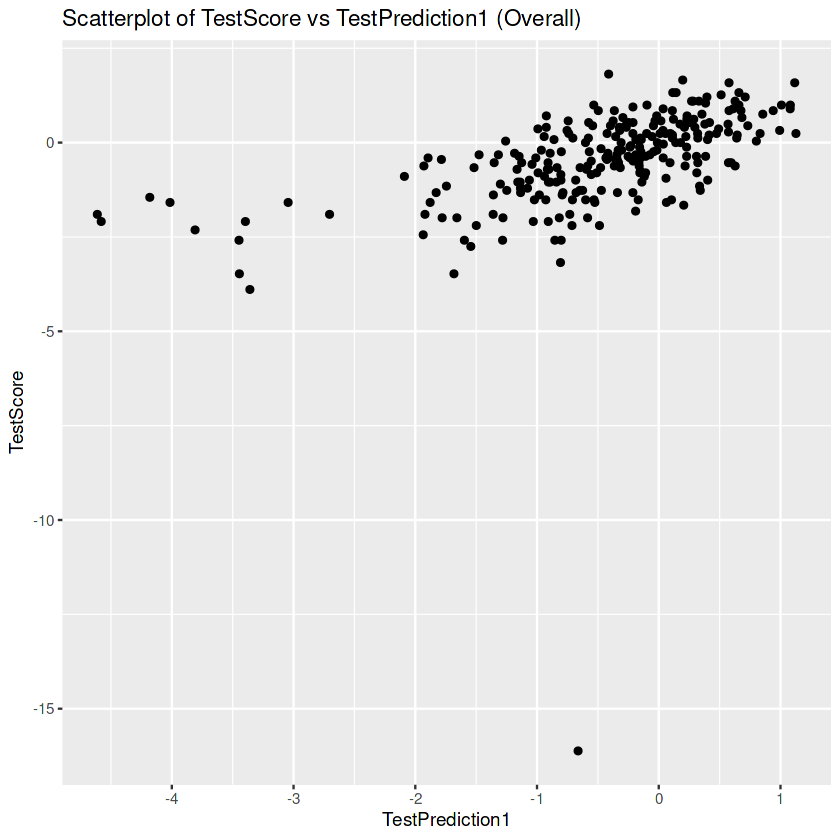

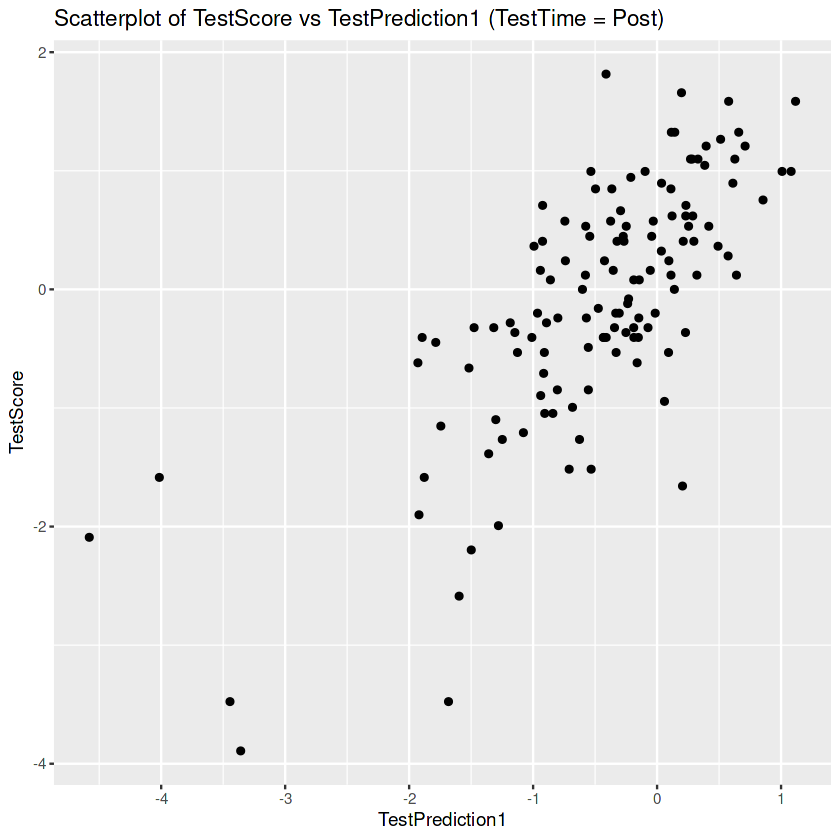

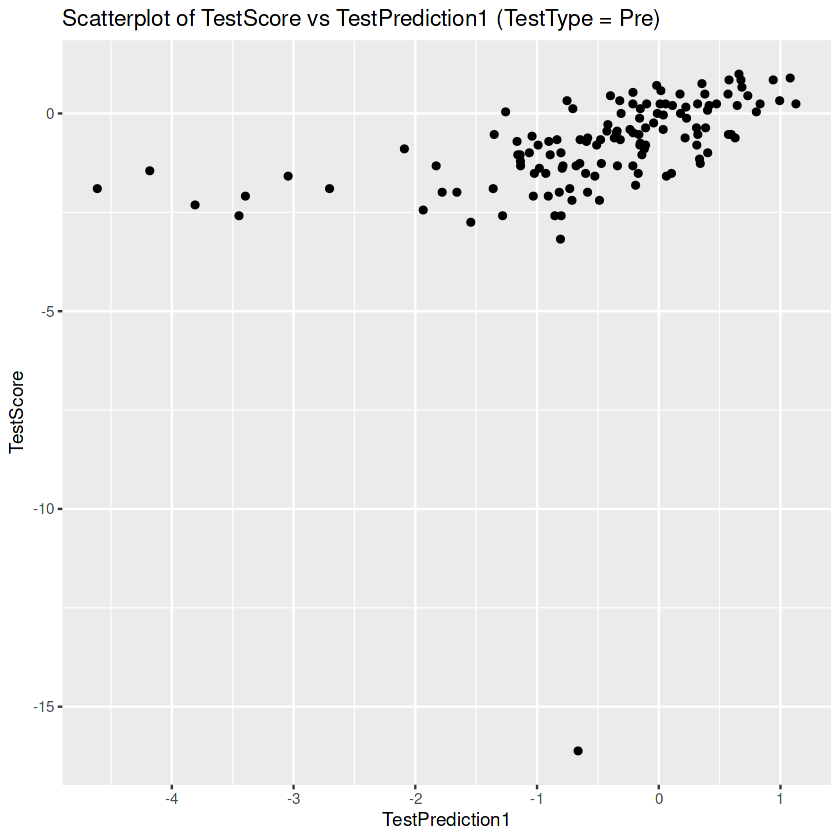

In [9]:
# Scatterplot overall (no conditions)
ggplot(train_df, aes(x = TestPrediction1, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (Overall)")

# Scatterplot for TestTime = Post
ggplot(subset(train_df, TestTime == "Post"), aes(x = TestPrediction1, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (TestTime = Post)")

# Scatterplot for TestType = Pre
ggplot(subset(train_df, TestTime == "Pre"), aes(x = TestPrediction1, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (TestType = Pre)")

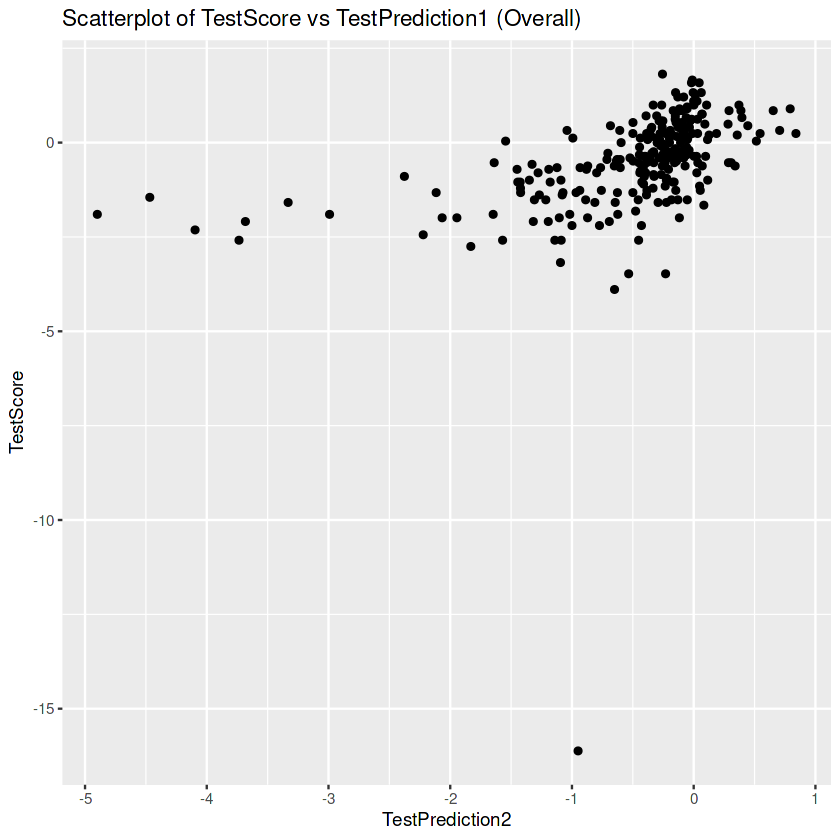

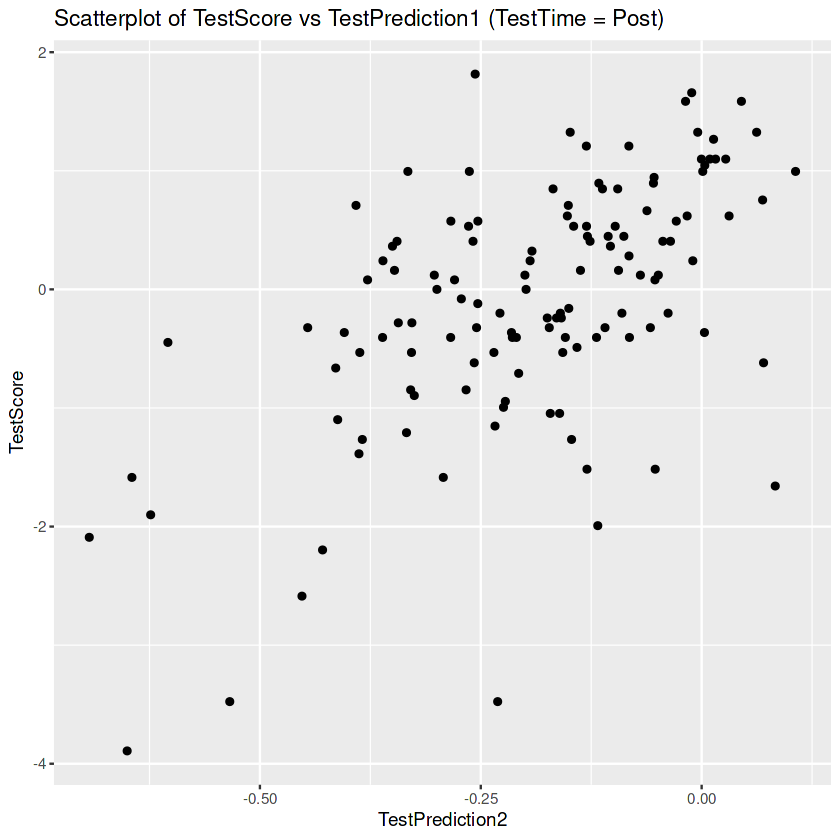

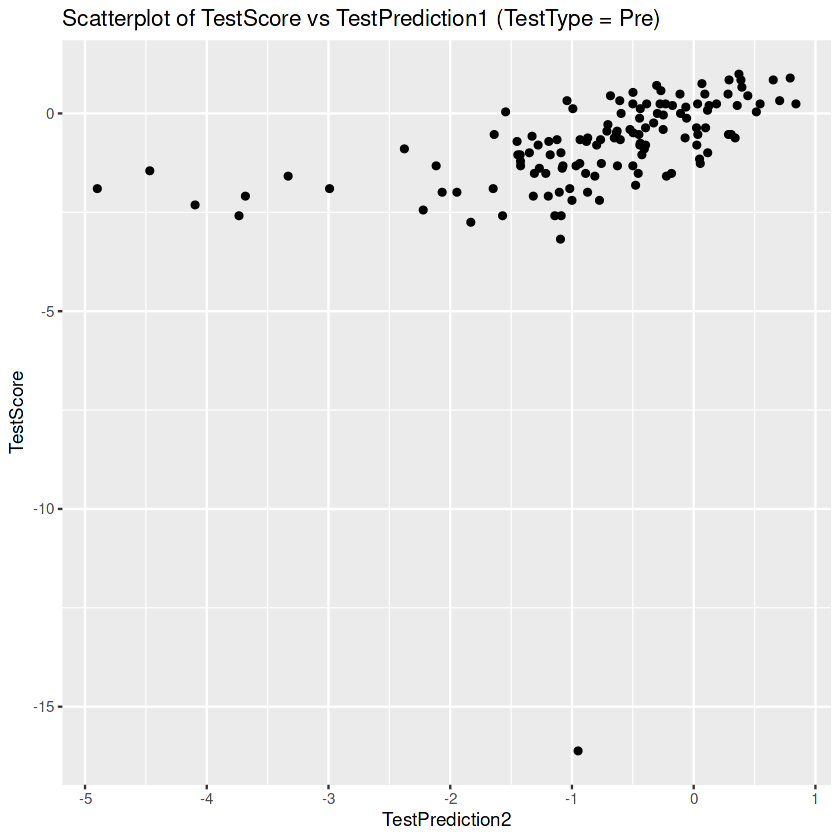

In [10]:
# Scatterplot overall (no conditions)
ggplot(train_df, aes(x = TestPrediction2, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (Overall)")

# Scatterplot for TestTime = Post
ggplot(subset(train_df, TestTime == "Post"), aes(x = TestPrediction2, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (TestTime = Post)")

# Scatterplot for TestType = Pre
ggplot(subset(train_df, TestTime == "Pre"), aes(x = TestPrediction2, y = TestScore)) +
  geom_point() +
  labs(title = "Scatterplot of TestScore vs TestPrediction1 (TestType = Pre)")